## Example
This is a simple demo on video set that has been corrupted

In [1]:
# Torch and Numpy are needed for RPCA
import torch
import numpy as np

# Imports for building that data set and showing results.
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image, display
import os
from os import chdir
# Import Local Files with scripts
import sys
from Pursuit import *
from SubGD import *
from Utils import *

import time
# Set Device to CUDA to run GPU
# This notebook is run on CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_folder = "MovedObject"
os.chdir(r"C:\Users\Tomjl\OneDrive\Desktop\473_project_folder")
# List image files within the specified folder
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg','.bmp'))])


### Build the dataset

GIF saved successfully.


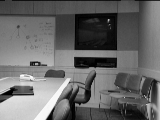

In [8]:
data_frame_ = build_data_set(image_folder,start=630,end=820, standardized = True )
# This function takes a sequence of frames and compiles into a gif
return_animated_gif(data_frame_, output_filename='ExampleGif.gif', frame_duration=5, image_size=(120, 160))
# we display the corrupted gif
from IPython.display import Image, display
display(Image(filename='ExampleGif.gif'))

## Call SubGD Solver


In [18]:
# If the rank is unknown, pass a list of guesses and solve iteratively, and store the results using the code that i gave below
# we only run for a brief amount of time on local in this example.
ranks_ = [2]
sparse_results_ = []
for iteration, rank in enumerate(ranks_):
    start_time = time.time()
    subdd_model = SubGD(data_frame_, device_ = device, rank_ = rank)
    print(f"Rank for problem is: {rank}")
    L,S = subdd_model.fit(iterations = 1200,
                        tolerance = .1,
                        mu = .9, 
                        beta_ = .95,
                        gamma_ = .2, 
                        prints = True,
                        iter_prints = 100)
    del(subdd_model) # On large datasets, we can have 2 instances of a problem floating around for brief periods on device. Consumes VRAM.
    # I suggest removing torch tensors from device before storing
    sparse = S.detach().cpu().numpy()
    sparse_results_.append(sparse)
    end_time = time.time()
    duration_seconds = end_time - start_time
    print(f"Total duration: {duration_seconds:.2f} seconds")

Rank for problem is: 2
 error rate: 0.6784954730833966 at iteration 100
 error rate: 0.5962345437310731 at iteration 200
 error rate: 0.4467942757271885 at iteration 300
 error rate: 0.35524286351869344 at iteration 400
 error rate: 0.2931604221703815 at iteration 500
 error rate: 0.25008451743468385 at iteration 600
 error rate: 0.22627917449117355 at iteration 700
 error rate: 0.21020006573346095 at iteration 800
 error rate: 0.17579457504463986 at iteration 900
 error rate: 0.1738911433446629 at iteration 1000
 error rate: 0.17368023565056204 at iteration 1100
Total duration: 63.37 seconds


### Returns 

GIF saved successfully as ExampleRPCA.gif.


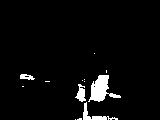

In [22]:
# Extract from the list this way. If on GPU, use .detach().cpu().numpy(). 
sparse_show = torch.tensor(sparse_results_[0]).numpy()

# Takes the top 10% of values and maximizes. Rest are 0. 
percentile_animated_gif(sparse_show, output_filename='ExampleRPCA.gif',percentile_cutoff=95, frame_duration=5, image_size=(120, 160))
from IPython.display import Image, display
display(Image(filename='ExampleRPCA.gif'))